# Mutagenèse
Dans ces expériences, un génome aléatoire est généré en respectant ou non les hypothèses suivantes :
- le génome est homogène (tous les segments non codants ont la même longueur)
- le génome est unidirectionnel

A chaque itération, on applique une mutation donnée, on vérifie sa neutralité et on détermine ses caractéristiques (longueur par exemple).
Cela se fait pour diverses valeurs de $g$, $z_c$ et $z_{nc}$

Sur les graphiques, les barres autour des points représentent la variance de l'estimateur qui est la variance de l'échantillon sur la taille de l'échantillon $\left(\frac{\sigma²}{n}\right)$.

## Imports, objets et fonctions

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [43]:
class Results:
    def __init__(self, power_min, power_max):
        self.power_min, self.power_max = power_min, power_max
        results_length = self.power_max - self.power_min + 1

        self.x_values = np.empty(results_length, dtype="int")

        self.neutral_proportions = np.empty(results_length, dtype="float")
        self.neutral_proportiond_stds = np.empty(results_length, dtype="float")

        self.theoretical_proportions = np.empty(results_length, dtype="float")

        self.length_means = np.empty(results_length, dtype="float")
        self.length_means_stds = np.empty(results_length, dtype="float")

        self.theoretical_lengths = np.empty(results_length, dtype="float")

    def load_results(self, folder):
        d_results = {}
        for exposant in range(self.power_min, self.power_max + 1):
            with open(f"{folder}/{exposant}.json") as json_file:
                d_results[exposant] = json.load(json_file)
        for index, (exposant, results) in enumerate(d_results.items()):
            self.x_values[index] = float(f"1e{exposant}")
            self.neutral_proportions[index] = results["Neutral mutations proportion"]
            self.neutral_proportiond_stds[index] = results[
                "Neutral mutations standard deviation of proportion estimator"
            ]

            self.theoretical_proportions[index] = results["Neutral probability theory"]

            self.length_means[index] = results["Length mean"]
            self.length_means_stds[index] = results[
                "Length standard deviation of mean estimator"
            ]

            self.theoretical_lengths[index] = results["Length mean theory"]


results = Results(0, 5)

In [44]:
experiment_name = "test_g/3"

## $z_{nc}$ variable, $g$ et $z_c$ constants (respectivement 40 et 200)
### Génome homogène et unidirectionnel

#### Mutations ponctuelles

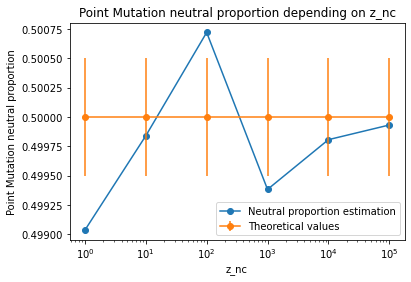

In [46]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Point mutation")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Point Mutation neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Point Mutation neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de mutations ponctuelles neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5.

#### Petites Insertions

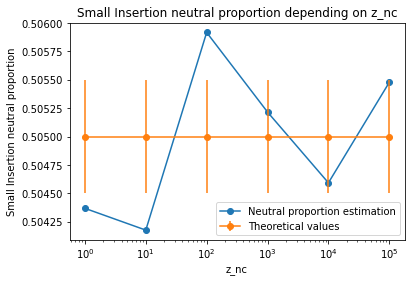

In [47]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de petites insertions neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5005.

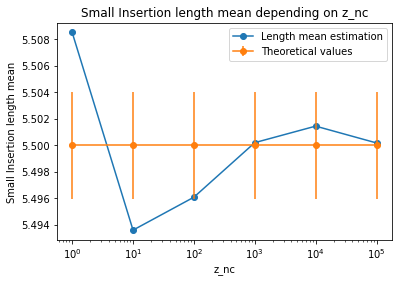

In [48]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

Les longueurs moyennes des mutations sont conformes au modèle, indépendantes de $g$ et égales à 5,5

#### Petites Délétions

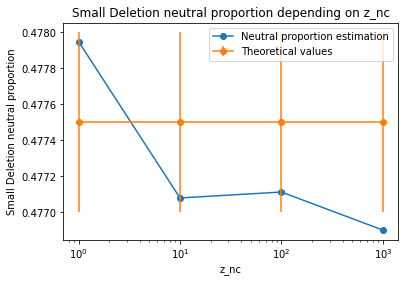

In [49]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

indices = slice(0, -2)

plt.plot(
    results.x_values[indices],
    results.neutral_proportions[indices],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[indices],
    results.theoretical_proportions[indices],
    results.neutral_proportiond_stds[indices],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle.

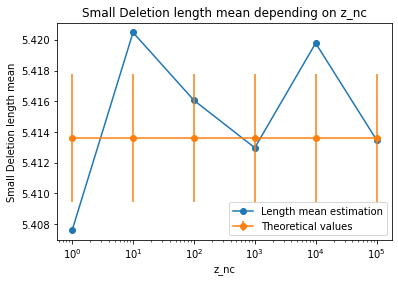

In [50]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèle.

#### Duplications

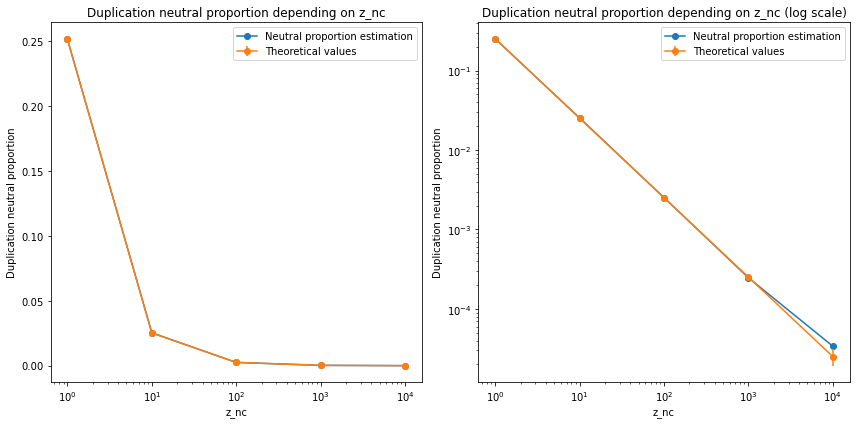

In [59]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

indices = slice(0, -1)

axs[0].plot(
    results.x_values[indices],
    results.neutral_proportions[indices],
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values[indices],
    results.theoretical_proportions[indices],
    results.neutral_proportiond_stds[indices],
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on z_nc")

axs[0].set_xlabel("z_nc")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values[indices],
    results.neutral_proportions[indices],
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values[indices],
    results.theoretical_proportions[indices],
    results.neutral_proportiond_stds[indices],
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

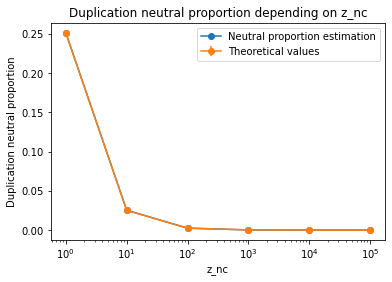

In [52]:
cut = 0
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

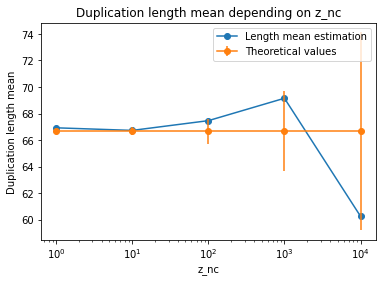

In [53]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Deletions

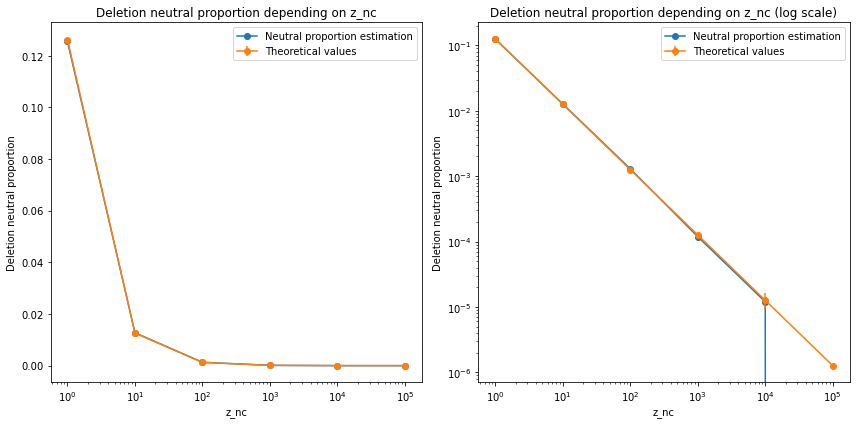

In [54]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
indices = slice(0, 7)
axs[0].plot(
    results.x_values[indices],
    results.neutral_proportions[indices],
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values[indices],
    results.theoretical_proportions[indices],
    results.neutral_proportiond_stds[indices][indices],
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on z_nc")

axs[0].set_xlabel("z_nc")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values[indices],
    results.neutral_proportions[indices],
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values[indices],
    results.theoretical_proportions[indices],
    results.neutral_proportiond_stds[indices],
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

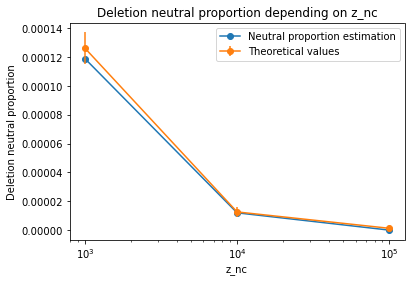

In [55]:
cut = 3
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

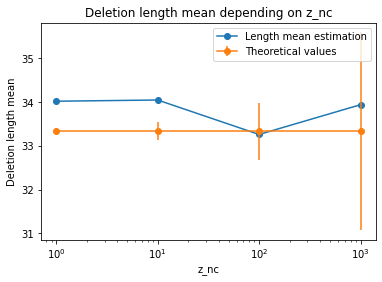

In [56]:
cut = slice(0, -2)  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[cut],
    results.length_means[cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[cut],
    results.theoretical_lengths[cut],
    results.length_means_stds[cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

Les observations sont conformes au modèles.

#### Inversions

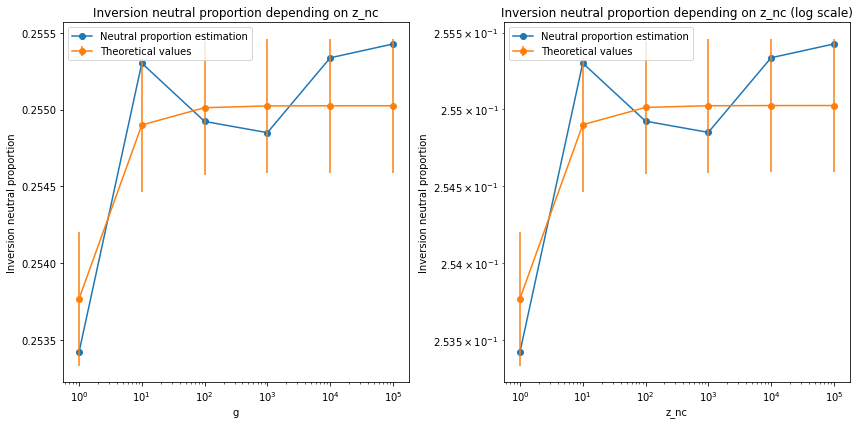

In [57]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on z_nc")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

Les observations sont conformes au modèles.

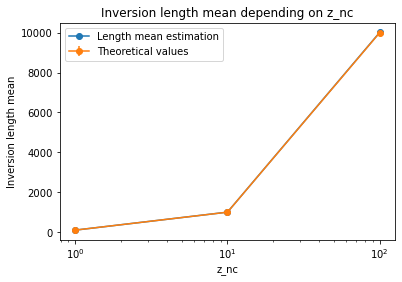

In [58]:
cut = -3  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Inversion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

La formule théorique est une approximation...

### Sans les hypothèses d'homogénéité et d'unidirectionnalité

In [116]:
experiment_name = "comp_1/1"

#### Mutations ponctuelles

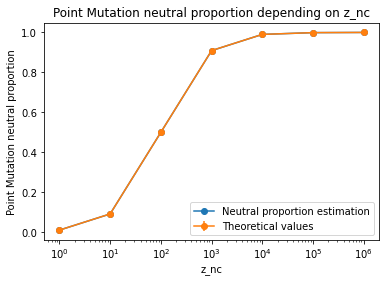

In [117]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Point mutation")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Point Mutation neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Point Mutation neutral proportion")

plt.legend()
plt.show()
plt.close()

#### Petites insertions

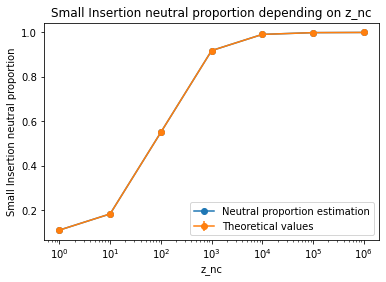

In [118]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

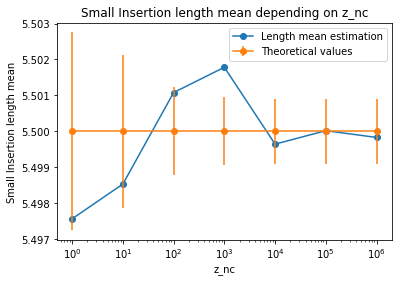

In [119]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

#### Petites délétions

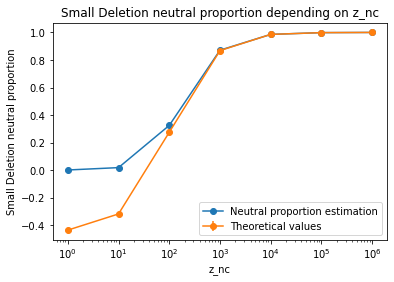

In [120]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

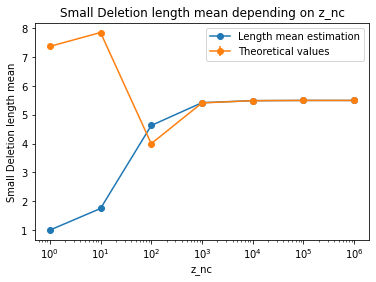

In [121]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

#### Duplication

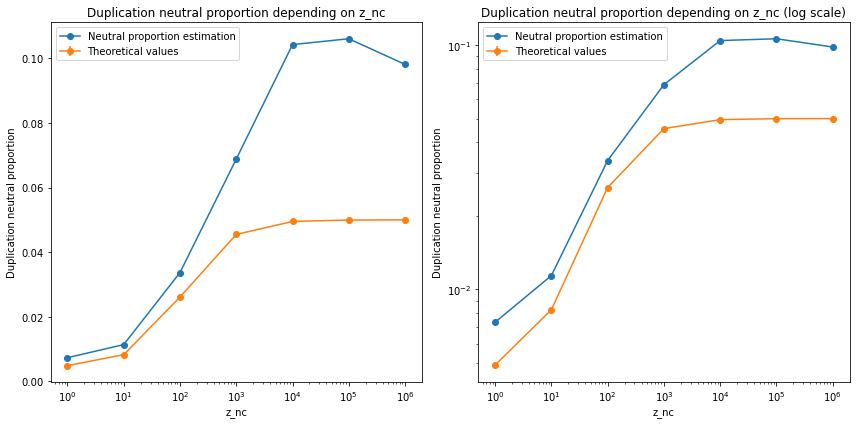

In [122]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on z_nc")

axs[0].set_xlabel("z_nc")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

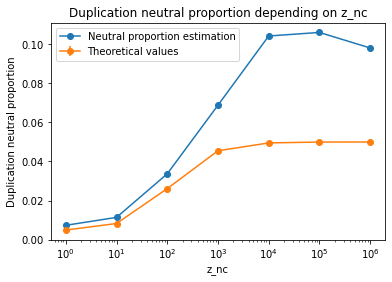

In [123]:
cut = 0
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")

plt.legend()
plt.show()
plt.close()

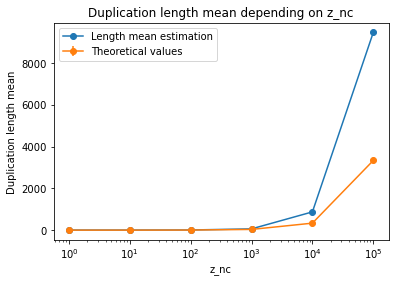

In [124]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

#### Délétions

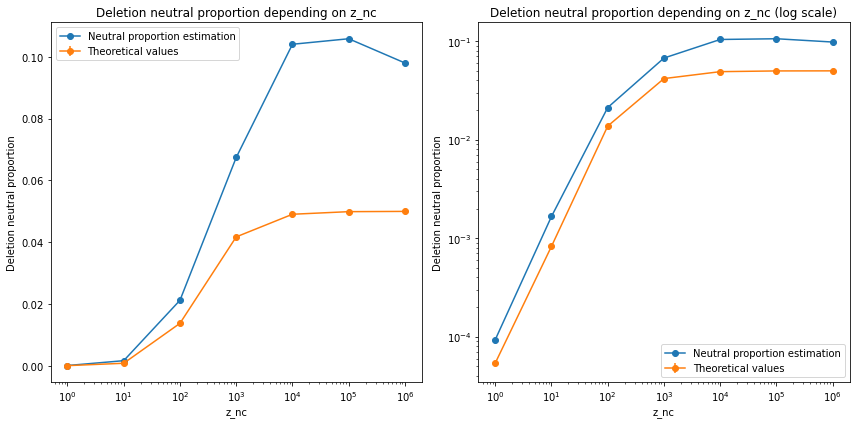

In [125]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on z_nc")

axs[0].set_xlabel("z_nc")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

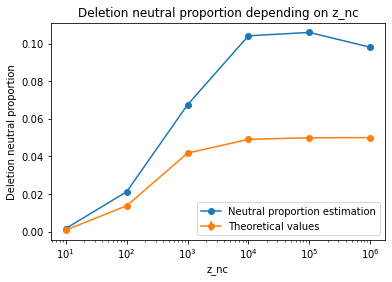

In [126]:
cut = 1
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

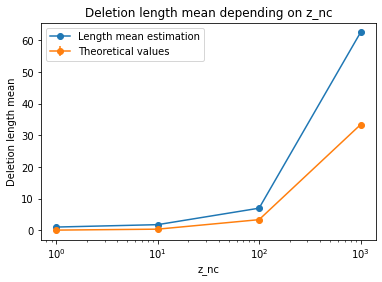

In [127]:
cut = -3  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

#### Inversions

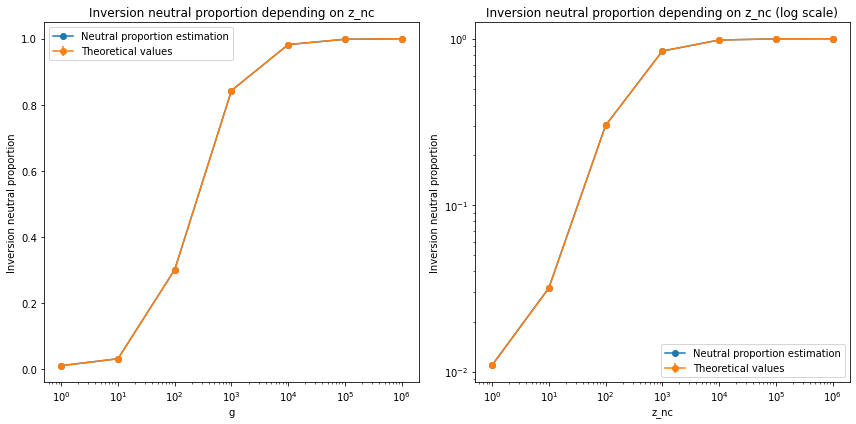

In [128]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on z_nc")

axs[0].set_xlabel("g")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on z_nc (log scale)")

axs[1].set_xlabel("z_nc")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

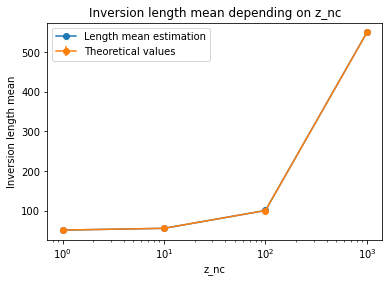

In [129]:
cut = -3  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Inversion length mean depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Inversion length mean")

plt.legend()
plt.show()
plt.close()

## Conclusion sur les hypothèse pour des rapports $\frac{z_c}{g}$ et $\frac{z_{nc}}{g}$ constants

Les hypothèses d'homogénéité et d'unidirectionnalité du génome introduisent un biais négatif sur la proportion de mutation neutre et sur leur longueur moyenne.

## Rapport duplication sur délétion
### Sous les hypothèses du modèle

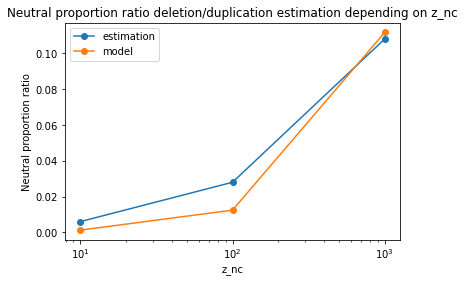

In [130]:
results_duplication = Results(0, 6)
results_deletion = Results(0, 6)

experiment_name = "ref_model/1"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")

indices = [1, 2, 3]

results = results_deletion.neutral_proportions / results_duplication.neutral_proportions
plt.plot(results_duplication.x_values[indices], results[indices], marker="o", label="estimation")


results = results_deletion.theoretical_proportions / results_duplication.theoretical_proportions
plt.plot(results_duplication.x_values[indices], results[indices], marker="o", label="model")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on z_nc")

plt.xlabel("z_nc")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()

plt.show()

Les délétions sont environ deux fois moins neutres que les duplications dans le modèle mathématiques.

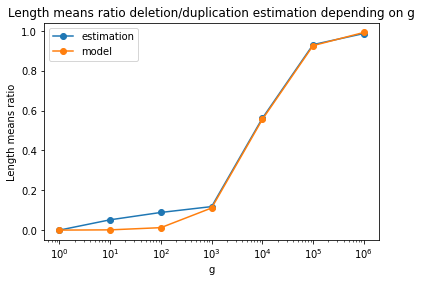

In [131]:
results = results_deletion.length_means / results_duplication.length_means
plt.plot(results_duplication.x_values, results, marker="o", label="estimation")

results = results_deletion.theoretical_lengths / results_duplication.theoretical_lengths
plt.plot(results_duplication.x_values, results, marker="o", label="model")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

Les longueurs des délétions sont en moyennes deux fois plus faibles que celles des duplications sous les hypothèses du modèle mathématiques.

### Dans un génome hétérogène et orienté

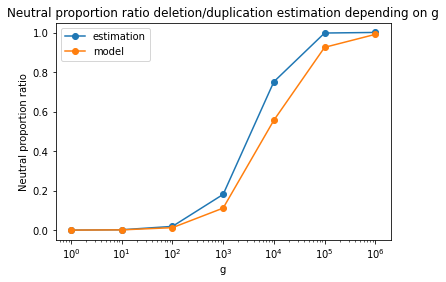

In [132]:
results_duplication = Results(0, 6)
results_deletion = Results(0, 6)

experiment_name = "ref/1"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")

results = results_deletion.neutral_proportions / results_duplication.neutral_proportions
plt.plot(results_duplication.x_values, results, marker="o", label="estimation")

results = results_deletion.theoretical_proportions / results_duplication.theoretical_proportions
plt.plot(results_duplication.x_values, results, marker="o", label="model")


plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()

plt.show()

Sans les hypothèses d'homogénéité et d'unidirectionnalité, le rapport de neutralité entre délétions et duplications est légèrement plus élevé.

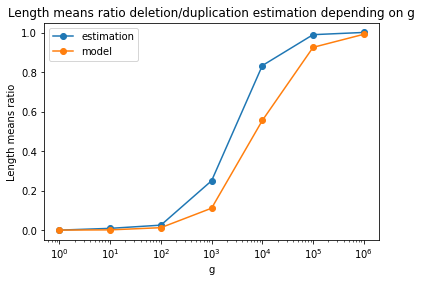

In [133]:
results = results_deletion.length_means / results_duplication.length_means
plt.plot(results_duplication.x_values, results, marker="o", label="estimation")

results = results_deletion.theoretical_lengths / results_duplication.theoretical_lengths
plt.plot(results_duplication.x_values, results, marker="o", label="model")

plt.title(f"Length means ratio deletion/duplication estimation depending on g")

plt.xlabel("g")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

Sans les hypothèses d'homogénéité et d'unidirectionnalité, le rapport des longueurs entre délétions et duplications est plus élevé.